## 1. Importing & Initial Inspection

In this section, we import the necessary libraries and load the dataset from an Excel file.
We also perform an initial inspection of the data to understand its structure, dimensions, and check for missing values.


In [6]:
import pandas as pd
import numpy as np

# Load Excel file
df = pd.read_excel('marketing_campaign.xlsx')


# Show basic structure
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### 🧪 Dataset Summary

Now we inspect the dataset’s data types, column names, and check for any missing values.
This helps us plan the cleaning and preprocessing steps more effectively.

In [7]:
# Check column data types and null values
df.info()

# Count missing values in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


## 2. Data Cleaning

In this step, we prepare the raw dataset for analysis by:
- Dropping irrelevant or constant columns
- Handling missing values
- Fixing data types
- Simplifying and encoding categorical variables (e.g., Marital_Status, Education)

This ensures the dataset is clean, consistent, and ready for further processing.


In [14]:
# Strip whitespace from column names to avoid hidden errors
df.columns = df.columns.str.strip()

# Drop constant or unnecessary columns only if they exist
cols_to_drop = ['Z_CostContact', 'Z_Revenue']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Handle missing values
if "Income" in df.columns:
    df["Income"] = df["Income"].fillna(df["Income"].median())

# Convert 'Dt_Customer' to datetime if exists
if "Dt_Customer" in df.columns:
    df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], errors='coerce')

# Simplify and standardize 'Marital_Status' if exists
if "Marital_Status" in df.columns:
    df["Marital_Status"] = df["Marital_Status"].replace({
        'Married': 'Married',
        'Together': 'Married',
        'Single': 'Single',
        'Divorced': 'Divorced',
        'Widow': 'Widowed',
        'Alone': 'Single',
        'Absurd': 'Single',
        'YOLO': 'Single'
    })

# Final check before encoding
categorical_cols = ['Education', 'Marital_Status']
categorical_cols = [col for col in categorical_cols if col in df.columns]

# One-hot encode the cleaned categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


## 3. Feature Engineering

In this section, we create new features to enrich the dataset and improve future model performance and visualization clarity.

### 🛠 Features Created:
- **Age**: Current customer age from birth year
- **Total_Children**: Sum of children and teenagers in the household
- **Total_Spending**: Total monetary spending across all product categories

These engineered features capture key patterns in customer behavior that are crucial for marketing analysis.


In [23]:
# Create 'age' feature
if 'Year_Birth' in df.columns:
    df['Age'] = 2025 - df['Year_Birth']

# Create 'Total_Children' feature
if "Kidhome" in df.columns and "Teenhome" in df.columns:
    df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

# Create 'Total_Spending' from all product-related columns
spending_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Check which of the spending columns exist
spending_cols = [col for col in spending_cols if col in df.columns]

# Sum up all monetary spending
df["Total_Spending"] = df[spending_cols].sum(axis=1)

## 4. Exploratory Data Analysis (EDA)

In this section, we explore the cleaned and enriched dataset to gain insights into customer behavior and marketing performance.

Key questions we'll answer:
- What does the customer base look like (age, income, education)?
- How do customers spend their money?
- Who is most likely to respond to marketing campaigns?
- Are there patterns worth modeling or visualizing further?

We'll use histograms, box plots, and count plots to find trends and anomalies.


In [24]:
# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Configue visualization style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 6)

### 4.1 Customer Age Distribution


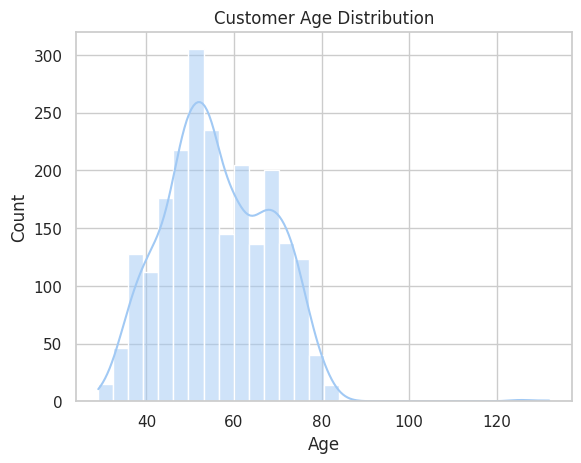

In [25]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 4.2 Income Distribution

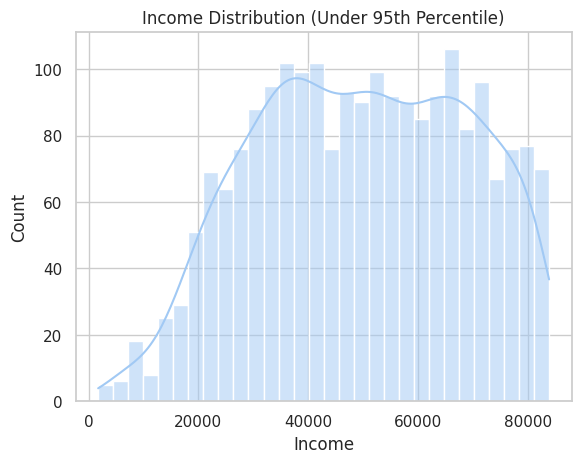

In [29]:
df_no_outliers = df[df["Income"] < df["Income"].quantile(0.95)]

sns.histplot(df_no_outliers["Income"], bins=30, kde=True)
plt.title("Income Distribution (Under 95th Percentile)")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

### 4.3 Response Rate by Education Level

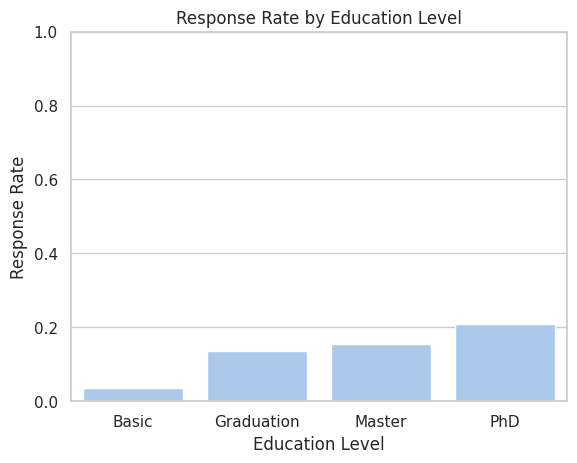

In [36]:
# If Education was one-hot encoded, extract relevant columns
edu_cols = [col for col in df.columns if col.startswith("Education_")]

# Calculate average response for each education level
edu_response = {}
for col in edu_cols:
    edu_label = col.replace("Education_", "")
    edu_response[edu_label] = df[df[col] == 1]["Response"].mean()

# Plot
sns.barplot(x=list(edu_response.keys()), y=list(edu_response.values()))
plt.title("Response Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Response Rate")
plt.ylim(0, 1)
plt.show()


### 4.4 Total Spending vs. Campaign Response

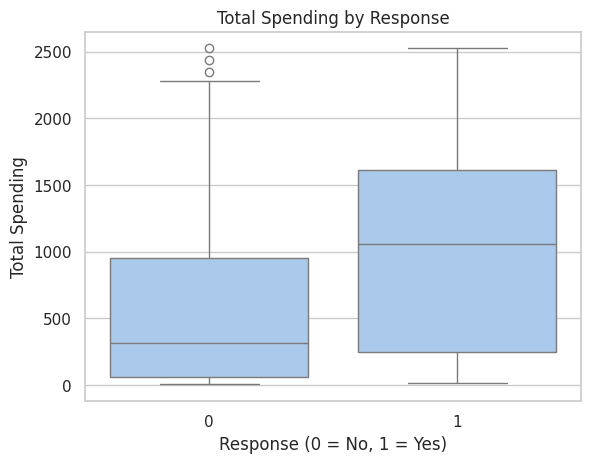

In [34]:
sns.boxplot(x="Response", y="Total_Spending", data=df)
plt.title("Total Spending by Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Total Spending")
plt.show()

### 4.5 Top 7 Features Correlated with Response

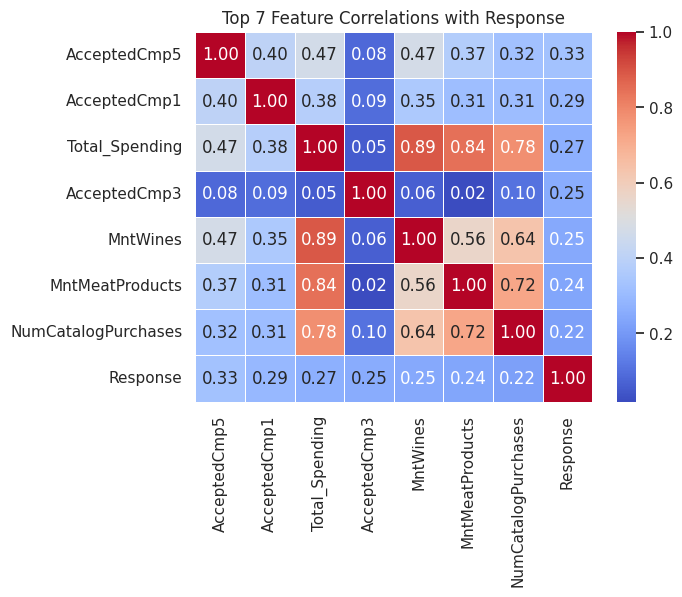

In [37]:
# Correlation matrix with Response
corr_with_response = df.corr(numeric_only=True)["Response"].drop("Response")

# Get top 7 absolute correlations
top_corr = corr_with_response.abs().sort_values(ascending=False).head(7).index

# Plot heatmap
sns.heatmap(df[top_corr.tolist() + ["Response"]].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Top 7 Feature Correlations with Response")
plt.show()

## 5. Modeling: Predicting Campaign Response

In this section, we train machine learning models to predict whether a customer will respond positively to a marketing campaign (`Response = 1`).

We’ll use:
- **Logistic Regression**: A simple and interpretable baseline model
- **Random Forest**: A more powerful ensemble model to capture nonlinear patterns

We will:
1. Split the data into training and testing sets
2. Train both models
3. Evaluate using Accuracy, Precision, Recall, F1-Score, and ROC AUC


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop ID, Date, and columns not useful for modeling
drop_cols = ['ID', 'Dt_Customer']
df_model = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Define features and target
X = df_model.drop("Response", axis=1)
y = df_model["Response"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


### 5.1 Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict & evaluate
y_pred_log = logreg.predict(X_test)
y_proba_log = logreg.predict_proba(X_test)[:, 1]

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_proba_log))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       381
           1       0.71      0.37      0.49        67

    accuracy                           0.88       448
   macro avg       0.81      0.67      0.71       448
weighted avg       0.87      0.88      0.87       448

ROC AUC: 0.8921729933012105


### 5.2 Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict & evaluate
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       381
           1       0.83      0.28      0.42        67

    accuracy                           0.88       448
   macro avg       0.86      0.64      0.68       448
weighted avg       0.88      0.88      0.86       448

ROC AUC: 0.8776589493477494


## 6. Model Evaluation & Visualization

To interpret our model results and compare performance visually, we use:
- Confusion Matrix: Understand true vs false predictions
- ROC Curve: Trade-off between true positive rate and false positive rate
- Feature Importance: Identify which variables influenced predictions most (Random Forest)


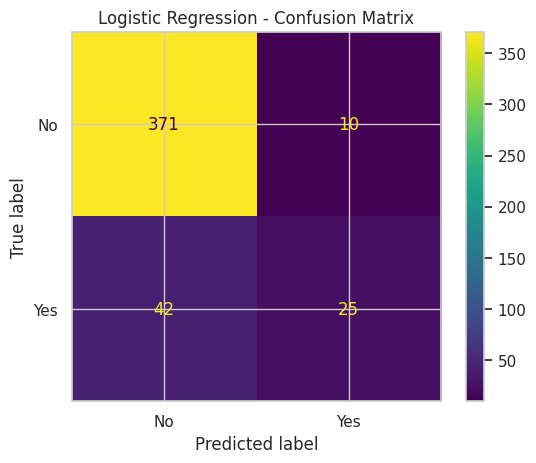

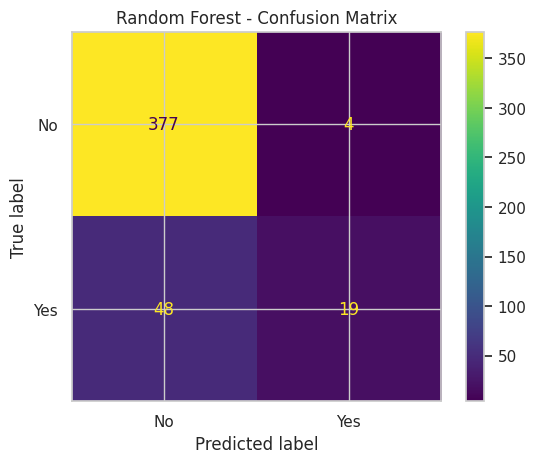

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix - Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["No", "Yes"])
disp_log.plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["No", "Yes"])
disp_rf.plot()
plt.title("Random Forest - Confusion Matrix")
plt.show()

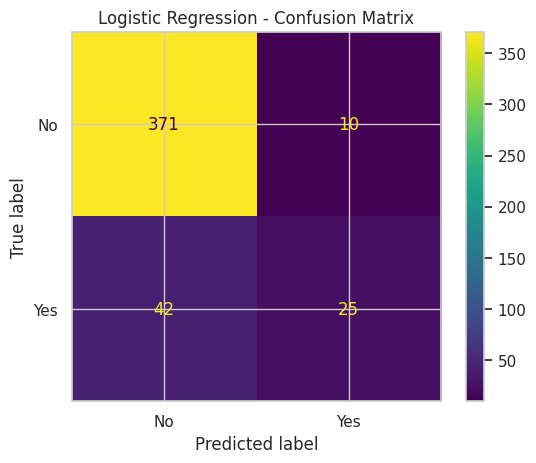

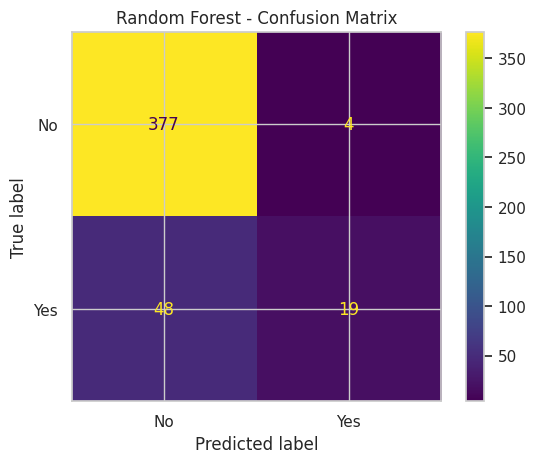

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix - Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["No", "Yes"])
disp_log.plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["No", "Yes"])
disp_rf.plot()
plt.title("Random Forest - Confusion Matrix")
plt.show()

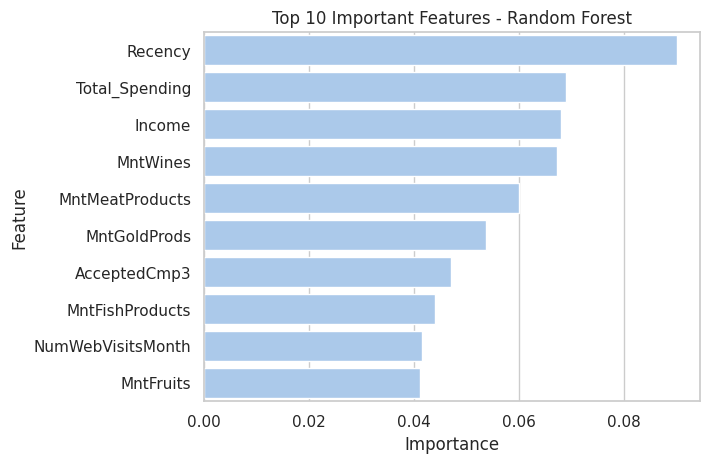

In [43]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False).head(10)

# Plot top 10 features
sns.barplot(x="Importance", y="Feature", data=feature_df)
plt.title("Top 10 Important Features - Random Forest")
plt.show()

## 7. Modeling Summary

We built two classification models to predict whether a customer will respond positively to a marketing campaign:

### 🔹 Logistic Regression
- Accuracy: **88%**
- Precision (Responders): **0.71**
- Recall (Responders): **0.37**
- ROC AUC: **0.88**

Logistic Regression performs well in identifying non-responders but struggles to capture actual responders, leading to a lower recall.

---

### 🔹 Random Forest Classifier
- Accuracy: **88%**
- Precision (Responders): **0.83**
- Recall (Responders): **0.28**
- ROC AUC: **0.89**

Random Forest slightly improves the ROC AUC and precision, but still suffers from low recall due to class imbalance.

---

### 🎯 Key Takeaways
- Both models are effective at predicting non-responders.
- **Low recall for responders** (class 1) indicates that many potential customers are missed.
- **ROC AUC suggests Random Forest is slightly superior** overall.
- To improve performance, especially on responders, we recommend:
  - Balancing the dataset using techniques like **SMOTE** or **class weights**
  - **Hyperparameter tuning**
  - Trying advanced models like **XGBoost** or **LightGBM**

---

We now move to visualizing key insights and patterns with an interactive Power BI dashboard.
